# CS725 : Foundations of Machine Learning


# Project Team:
- **Mahim Katiha** | 19i190002 
- **Subhadeep Chaudhuri** | 19i190010 
- **Saptarshi majumder** | 19i190011 

# Imports

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 4.9 MB/s 
     |████████████████████████████████| 59 kB 3.3 MB/s 
     |████████████████████████████████| 895 kB 37.4 MB/s 
     |████████████████████████████████| 3.3 MB 45.6 MB/s 
     |████████████████████████████████| 596 kB 33.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install datasets

     |████████████████████████████████| 290 kB 5.2 MB/s 
     |████████████████████████████████| 132 kB 46.3 MB/s 
     |████████████████████████████████| 1.1 MB 38.9 MB/s 
     |████████████████████████████████| 243 kB 50.5 MB/s 
     |████████████████████████████████| 271 kB 49.2 MB/s 
     |████████████████████████████████| 192 kB 47.5 MB/s 
     |████████████████████████████████| 160 kB 45.8 MB/s 


In [ ]:
import torch
!pip install flair

     |████████████████████████████████| 322 kB 5.3 MB/s 
     |████████████████████████████████| 64 kB 2.4 MB/s 
     |████████████████████████████████| 48 kB 5.5 MB/s 
     |████████████████████████████████| 19.7 MB 10.2 MB/s 
     |████████████████████████████████| 1.2 MB 35.3 MB/s 
     |████████████████████████████████| 981 kB 36.7 MB/s 
     |████████████████████████████████| 788 kB 37.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 62 kB 784 kB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=79d869e4e51c6df5d1329bbc386de03eeeac344f26c236b40b67ff8d18aa96cf
  Stored in directory: /root/.cache/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=daa0a3dd88cb70b2ef8b4be65c078a96d3e7be68fb0984debb591f986471ee2d
  Stored in di

In [ ]:
from transformers import AutoTokenizer, AutoModel
from torch.nn import functional as F
from transformers import BartForSequenceClassification, BartTokenizer
import warnings
warnings.filterwarnings("ignore")
from datasets import load_dataset
import re
import random
random.seed(1)
import flair
from flair.models import TARSClassifier
from flair.data import Sentence
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from transformers import pipeline

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('deepset/sentence_bert')
model = AutoModel.from_pretrained('deepset/sentence_bert')

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

Some weights of the model checkpoint at deepset/sentence_bert were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Helper functions

In [ ]:
def get_sentence_category(sentence,labels):
  # run inputs through model and mean-pool over the sequence
  # dimension to get sequence-level representations
  inputs = tokenizer.batch_encode_plus([sentence] + labels,
                                      return_tensors='pt',
                                      pad_to_max_length=True)
  input_ids = inputs['input_ids']
  attention_mask = inputs['attention_mask']
  output = model(input_ids, attention_mask=attention_mask)[0]
  sentence_rep = output[:1].mean(dim=1)
  label_reps = output[1:].mean(dim=1)

  # now find the labels with the highest cosine similarities to
  # the sentence
  similarities = F.cosine_similarity(sentence_rep, label_reps)
  closest = similarities.argsort(descending=True)
  for ind in closest:
      print(f'label: {labels[ind]} \t similarity: {similarities[ind]}')

In [ ]:
from transformers import pipeline

In [ ]:
classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

We can use this pipeline by passing in a sequence and a list of candidate labels. The pipeline assumes by default that only one of the candidate labels is true, returning a list of scores for each label which add up to 1.

In [ ]:
sequence = "How is the weather today?"
candidate_labels = ["climate", "environment", "economics"]

classifier(sequence, candidate_labels)

{'labels': ['environment', 'climate', 'economics'],
 'scores': [0.5216458439826965, 0.4680839478969574, 0.010270199738442898],
 'sequence': 'How is the weather today?'}

To do multi-class classification, simply pass `multi_class=True`. In this case, the scores will be independent, but each will fall between 0 and 1.

# Motivation

**Example 1**

In [ ]:
sentence1 = 'Who are you voting for in 2020?'
labels1 = ['business', 'entertainment','healthcare']

get_sentence_category(sentence=sentence1,labels=labels1)

label: entertainment 	 similarity: 0.013885590247809887
label: business 	 similarity: 0.0045241680927574635
label: healthcare 	 similarity: -0.01854478195309639


**Comment:** *Adding a new label **'politics'** to find similarity of the sentence with new label or category*

In [ ]:
sentence1 = 'Who are you voting for in 2020?'
labels1 = ['business', 'entertainment', 'healthcare', 'politics']

get_sentence_category(sentence=sentence1,labels=labels1)

label: politics 	 similarity: 0.2156153917312622
label: entertainment 	 similarity: 0.013885590247809887
label: business 	 similarity: 0.0045241680927574635
label: healthcare 	 similarity: -0.01854478195309639


**Comment:** 
*Rightly associates sentence in politics catergory (with highest cosine similarity) and the best thing is we didn't have to train the model on training examples separately with 'politics' category.*

**Language model semantic transfer!**

**Example 2**

In [ ]:
sentence2 = "How is the weather today?"
labels2 = ["environment", "economics", "elections"]

get_sentence_category(sentence=sentence2,labels=labels2)

label: environment 	 similarity: 0.34606584906578064
label: elections 	 similarity: 0.14676454663276672
label: economics 	 similarity: 0.13286791741847992


In [ ]:
sentence2 = "How is the weather today?"
labels2 = ["climate","environment", "economics", "elections"]

get_sentence_category(sentence=sentence2,labels=labels2)

label: climate 	 similarity: 0.4812147915363312
label: environment 	 similarity: 0.34606584906578064
label: elections 	 similarity: 0.1467645764350891
label: economics 	 similarity: 0.13286791741847992


# New Section

Here's an example of sentiment classification: 

In [ ]:
sequence = "I hated to visit there. Doesn't recommend"
candidate_labels = ["positive", "negative"]

classifier(sequence, candidate_labels)

{'labels': ['negative', 'positive'],
 'scores': [0.9970691204071045, 0.0029308951925486326],
 'sequence': "I hated to visit there. Doesn't recommend"}

So how does this method work?

The underlying model is trained on the task of Natural Language Inference (NLI), which takes in two sequences and determines whether they contradict each other, entail each other, or neither.

This can be adapted to the task of zero-shot classification by treating the sequence which we want to classify as one NLI sequence (called the premise) and turning a candidate label into the other (the hypothesis). If the model predicts that the constructed premise _entails_ the hypothesis, then we can take that as a prediction that the label applies to the text. Check out [this blog post](https://joeddav.github.io/blog/2020/05/29/ZSL.html) for a more detailed explanation.

By default, the pipeline turns labels into hypotheses with the template `This example is {class_name}.`. This works well in many settings, but you can also customize this for your specific setting. Let's add another review to our above sentiment classification example that's a bit more challenging:

In [ ]:
sequences = [
    "I hated to visit there. Doesn't recommend",
    "It was a good experience overall, But could have been better"
]
candidate_labels = ["positive", "negative"]

classifier(sequences, candidate_labels)

[{'labels': ['negative', 'positive'],
  'scores': [0.9970691204071045, 0.0029308951925486326],
  'sequence': "I hated to visit there. Doesn't recommend"},
 {'labels': ['positive', 'negative'],
  'scores': [0.971508800983429, 0.028491193428635597],
  'sequence': 'It was a good experience overall, But could have been better'}]

The second example is a bit harder. Let's see if we can improve the results by using a hypothesis template which is more specific to the setting of review sentiment analysis. Instead of the default, `This example is {}.`, we'll use, `The sentiment of this review is {}.` (where `{}` is replaced with the candidate class name)

In [ ]:
sequences = [
    "I hated to visit there. Doesn't recommend",
    "It was a good experience overall, But could have been better"
]
candidate_labels = ["positive", "negative"]
hypothesis_template = "The sentiment of this review is {}."

classifier(sequences, candidate_labels, hypothesis_template=hypothesis_template)

[{'labels': ['negative', 'positive'],
  'scores': [0.9933830499649048, 0.006616956554353237],
  'sequence': "I hated to visit there. Doesn't recommend"},
 {'labels': ['positive', 'negative'],
  'scores': [0.8924999237060547, 0.10750005394220352],
  'sequence': 'It was a good experience overall, But could have been better'}]

By providing a more precise hypothesis template, we are able to see a more accurate classification of the second review.

> Note that sentiment classification is used here just as an illustrative example. The [Hugging Face Model Hub](https://huggingface.co/models?filter=text-classification) has a number of models trained specifically on sentiment tasks which can be used instead.

# Datasets

In [ ]:
yahoo = load_dataset('yahoo_answers_topics')
tweets = load_dataset('tweet_eval', 'sentiment')
tweets_emotion = load_dataset('tweet_eval', 'emotion')

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/867 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/319M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset yahoo_answers_topics downloaded and prepared to /root/.cache/huggingface/datasets/yahoo_answers_topics/yahoo_answers_topics/1.0.0/b2712a72fde278f1d6e96cc4f485fd89ed2f79ecb231441e13645b53da021902. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.53k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/99.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

  0%|          | 0/6 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset tweet_eval downloaded and prepared to /root/.cache/huggingface/datasets/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/134k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/569 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/183 [00:00<?, ?B/s]

  0%|          | 0/6 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset tweet_eval downloaded and prepared to /root/.cache/huggingface/datasets/tweet_eval/emotion/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

# Data Pre-processing

In [ ]:
def clean(label):
    label = re.sub("([a-z])([A-Z])", "\\1 \\2", label)
    label = label.replace("_", " ")
    return label

In [ ]:
def sample_test_data(texts,labels, size):
    data = list(zip(texts, labels))
    data = [item for item in data if len(item[0].strip()) > 0]
    random.shuffle(data)
    texts, labels = zip(*data)
    return texts[:size], labels[:size], texts[size:], labels[size:]

In [ ]:
size = 1000 # change back to 1000

In [ ]:
yahoo_test_texts, yahoo_test_labels, _, _ = sample_test_data(yahoo['test']['best_answer'], yahoo['test']['topic'], size)
tweets_test_texts, tweets_test_labels, _, _ = sample_test_data(tweets['test']['text'], tweets['test']['label'], size)
tweets_emotion_test_texts, tweets_emotion_test_labels, _, _ = sample_test_data(tweets_emotion['test']['text'], tweets_emotion['test']['label'], size)

In [ ]:
data = [
    {
        "name": "yahoo_answers_topics", 
        "test_texts": yahoo_test_texts, 
        "test_labels": yahoo_test_labels, 
        "train_texts": yahoo['train']['best_answer'], 
        "train_labels": yahoo['train']['topic'], 
        "class_names": [clean(label) for label in yahoo['test'].features['topic'].names]
    },    
    {
        "name": "tweet_eval: emotion", 
        "test_texts": tweets_emotion_test_texts, 
        "test_labels": tweets_emotion_test_labels, 
        "train_texts": tweets_emotion['train']['text'], 
        "train_labels": tweets_emotion['train']['label'], 
        "class_names": [clean(label) for label in tweets_emotion['test'].features['label'].names]
    },
    {
        "name": "tweet_eval: sentiment", 
        "test_texts": tweets_test_texts, 
        "test_labels": tweets_test_labels,
        "train_texts": tweets['train']['text'], 
        "train_labels": tweets['train']['label'],
        "class_names": [clean(label) for label in tweets['test'].features['label'].names]
    }    
]

# Classifier 1: TARS

In [ ]:
def evaluate_TARS(dataset, default_name='neutral'):
    classifier = TARSClassifier.load('tars-base')
    total, correct = 0, 0
    for item, gold_label_idx in tqdm(zip(dataset["test_texts"], dataset["test_labels"]), total = len(dataset["test_texts"])):
        sentence = Sentence(item)
        classifier.predict_zero_shot(sentence, dataset["class_names"])
        sorted_labels = sorted(sentence.to_dict()['labels'], key=lambda k: k['confidence'], reverse=True)
        gold_label = dataset["class_names"][gold_label_idx]
        if len(sorted_labels) > 0:
            predicted_label = sorted_labels[0]['value']
        else:
            predicted_label = default_name
        if predicted_label == gold_label:
            correct += 1
        total += 1
        
    return correct/total

# Classifier 2: Transformers BART

In [ ]:
def evaluate_huggingface(dataset, template=None, model='base'):

    if model == 'base':
        classifier = pipeline("zero-shot-classification", device=0)
    else:
        classifier = pipeline("zero-shot-classification", model="roberta-large-mnli", device=0)
    
    correct = 0
    predictions, gold_labels = [], []
    for text, gold_label_idx in tqdm(zip(dataset["test_texts"], dataset["test_labels"]), total=len(dataset["test_texts"])):

        if template is not None:
            result = classifier(text, dataset["class_names"], multi_label=False, template=template)
        else:
            result = classifier(text, dataset["class_names"], multi_label=False)
        predicted_label = result['labels'][0]
        
        gold_label = dataset["class_names"][gold_label_idx]
        
        predictions.append(predicted_label)
        gold_labels.append(gold_label)
        
        if predicted_label == gold_label:
            correct += 1
            
    accuracy = correct/len(predictions)
    return accuracy

# Our computations

In [ ]:
results = {}

for dataset in data:
    print(dataset['name'])
    results[dataset['name']] = {}
    tars_acc = evaluate_TARS(dataset)
    results[dataset['name']]['TARS'] = tars_acc
    print("TARS:", tars_acc)

    bart_acc = evaluate_huggingface(dataset)
    results[dataset['name']]['Transformers Bart'] = bart_acc
    print("Transformers Bart", bart_acc)


yahoo_answers_topics
2021-11-19 11:50:43,187 https://nlp.informatik.hu-berlin.de/resources/models/tars-base/tars-base-v8.pt not found in cache, downloading to /tmp/tmpz7xnngwy


100%|██████████| 438064585/438064585 [00:19<00:00, 22058987.07B/s]

2021-11-19 11:51:03,461 copying /tmp/tmpz7xnngwy to cache at /root/.flair/models/tars-base-v8.pt


2021-11-19 11:51:04,887 removing temp file /tmp/tmpz7xnngwy
2021-11-19 11:51:04,948 loading file /root/.flair/models/tars-base-v8.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


TARS: 0.282


  0%|          | 0/1000 [00:00<?, ?it/s]

Transformers Bart 0.369
tweet_eval: emotion
2021-11-19 12:06:41,336 loading file /root/.flair/models/tars-base-v8.pt


  0%|          | 0/1000 [00:00<?, ?it/s]

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


TARS: 0.32


  0%|          | 0/1000 [00:00<?, ?it/s]

Transformers Bart 0.737
tweet_eval: sentiment
2021-11-19 12:11:09,779 loading file /root/.flair/models/tars-base-v8.pt


  0%|          | 0/1000 [00:00<?, ?it/s]

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


TARS: 0.494


  0%|          | 0/1000 [00:00<?, ?it/s]

Transformers Bart 0.475


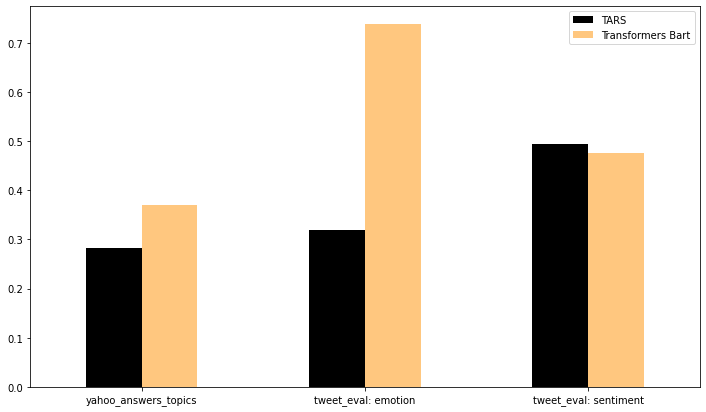

In [ ]:
df = pd.DataFrame.from_dict(results)
df = df.transpose()
df.plot(kind='bar', figsize=(12,7), colormap='copper', rot=0,)

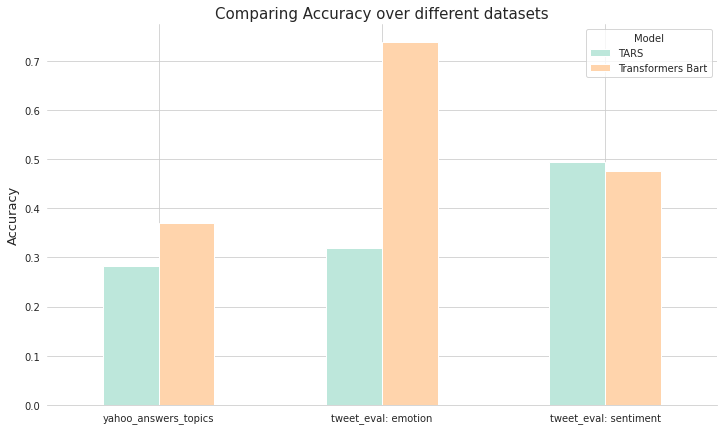

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
df.plot(kind='bar', figsize=(12,7), colormap='icefire', rot=0,)
plt.title("Comparing Accuracy over different datasets", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 13)
plt.legend(title = 'Model')
sns.despine(top=True, right=True, left=True, bottom=False)